**FIFA 19 Dataset Analysis**

In [1]:
# from IPython.display import HTML
# HTML('''
# <script>
#   function code_toggle() {
#     if (code_shown){
#       $('div.input').hide('500');
#       $('#toggleButton').val('Show Code')
#     } else {
#       $('div.input').show('500');
#       $('#toggleButton').val('Hide Code')
#     }
#     code_shown = !code_shown
#   }

#   $( document ).ready(function(){
#     code_shown=false;
#     $('div.input').hide()
#   });
# </script>
# <form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

**Data Preprocessing**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))


# Any results you write to the current directory are saved as output.

['data.csv']


In [3]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../input/data.csv")
df = df.drop('Unnamed: 0', axis=1)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


**Data Visualization**

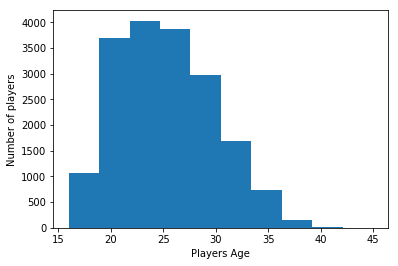

The oldest player in FIFA 19 is 45 years old. His name is O. Pérez he is from Mexico and plays for Pachuca .
The median age of a player on FIFA 19 is 25.122205745043114
The youngest players is 16 years old. His name is W. Geubbels he is from France and plays for AS Monaco .


In [4]:
import matplotlib.pyplot as plt
plt.hist(df['Age'])
plt.xlabel('Players Age')
plt.ylabel('Number of players')
plt.show()
oldest = df.loc[df['Age'].idxmax()]
print("The oldest player in FIFA 19 is", df['Age'].max(), "years old. His name is", oldest['Name'], 
      'he is from',oldest['Nationality'],'and plays for',oldest['Club'],'.')
print('The median age of a player on FIFA 19 is', np.mean(df['Age']))
youngest = df.loc[df['Age'].idxmin()]
print('The youngest players is',df['Age'].min(), "years old. His name is", youngest['Name'], 
      'he is from',youngest['Nationality'],'and plays for',youngest['Club'],'.')

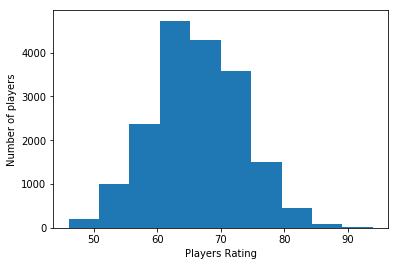

The best player in FIFA 19 is 94 overall. His name is L. Messi he is from Argentina and plays for FC Barcelona .
The median rating of a player on FIFA 19 is 66.23869940132916
The worst players is 46 overall. His name is G. Nugent he is from England and plays for Tranmere Rovers .


In [5]:
import matplotlib.pyplot as plt
plt.hist(df['Overall'])
plt.xlabel('Players Rating')
plt.ylabel('Number of players')
plt.show()
best = df.loc[df['Overall'].idxmax()]
print("The best player in FIFA 19 is", df['Overall'].max(), "overall. His name is", best['Name'], 
      'he is from',best['Nationality'],'and plays for',best['Club'],'.')
print('The median rating of a player on FIFA 19 is', np.mean(df['Overall']))
worst = df.loc[df['Overall'].idxmin()]
print('The worst players is',df['Overall'].min(), "overall. His name is", worst['Name'], 
      'he is from',worst['Nationality'],'and plays for',worst['Club'],'.')

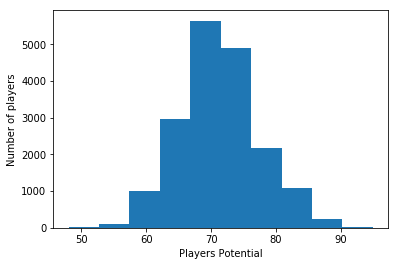

The best potential player in FIFA 19 is 95 overall. His name is K. Mbappé he is from France and plays for Paris Saint-Germain .
The median potential rating of a player on FIFA 19 is 71.30729939034437
The worst potential player is 48 overall. His name is Y. Uchimura he is from Japan and plays for Hokkaido Consadole Sapporo .


In [6]:
import matplotlib.pyplot as plt
plt.hist(df['Potential'])
plt.xlabel('Players Potential')
plt.ylabel('Number of players')
plt.show()
bestp = df.loc[df['Potential'].idxmax()]
print("The best potential player in FIFA 19 is", df['Potential'].max(), "overall. His name is", bestp['Name'], 
      'he is from',bestp['Nationality'],'and plays for',bestp['Club'],'.')
print('The median potential rating of a player on FIFA 19 is', np.mean(df['Potential']))
worstp = df.loc[df['Potential'].idxmin()]
print('The worst potential player is',df['Potential'].min(), "overall. His name is", worstp['Name'], 
      'he is from',worstp['Nationality'],'and plays for',worstp['Club'],'.')

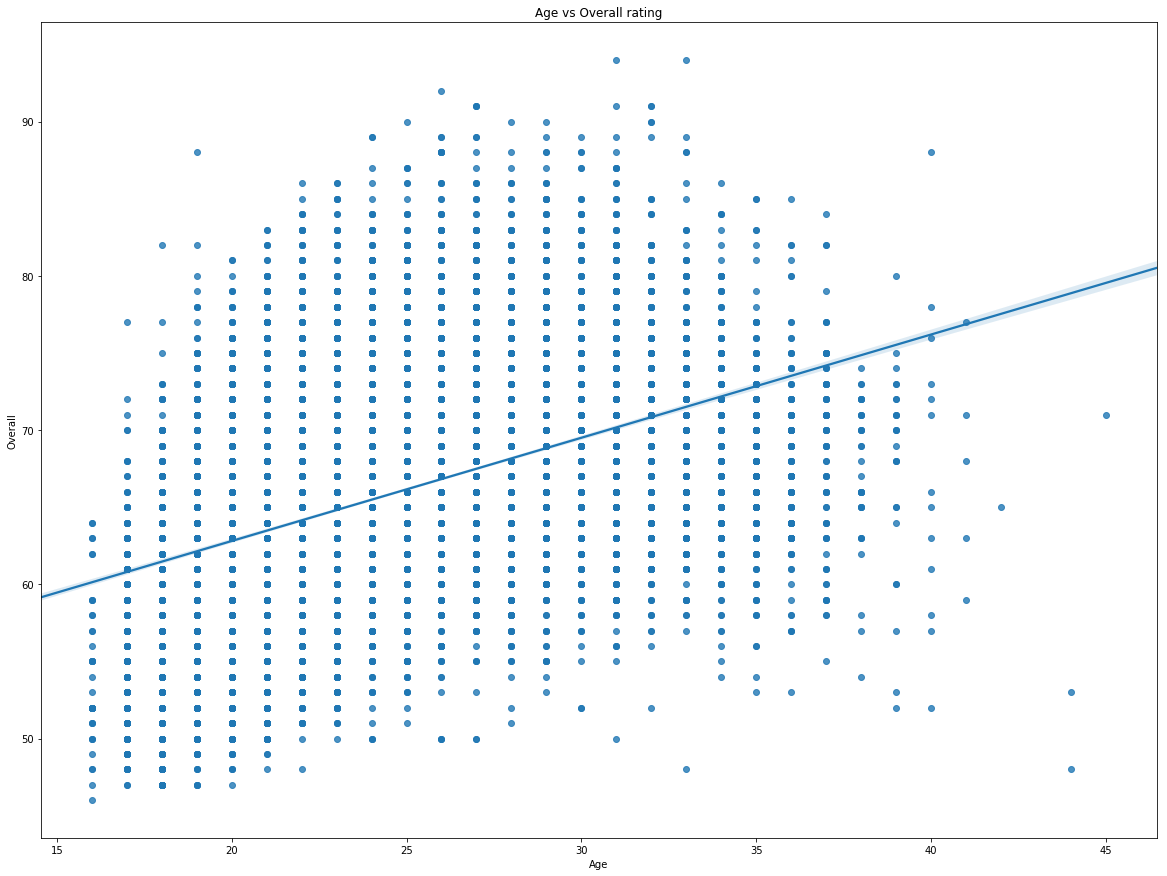

In [7]:
import seaborn as sns
plt.figure(figsize=(20, 15))
sns.regplot(df['Age'] , df['Overall'])
plt.title('Age vs Overall rating')
plt.show()

In [8]:
#Creating Dateframe with playars above 88 overall
df1 = df.query("Overall>=88")
df1.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Text(0.5, 1.0, 'Number of Players with Rating greater than 90')

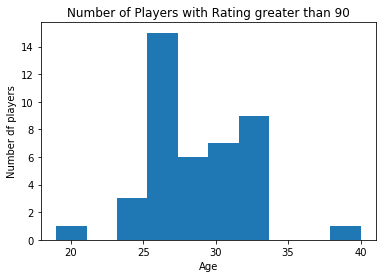

In [9]:
plt.hist(df1.Age)
plt.xlabel('Age')
plt.ylabel('Number df players')
plt.title('Number of Players with Rating greater than 90')

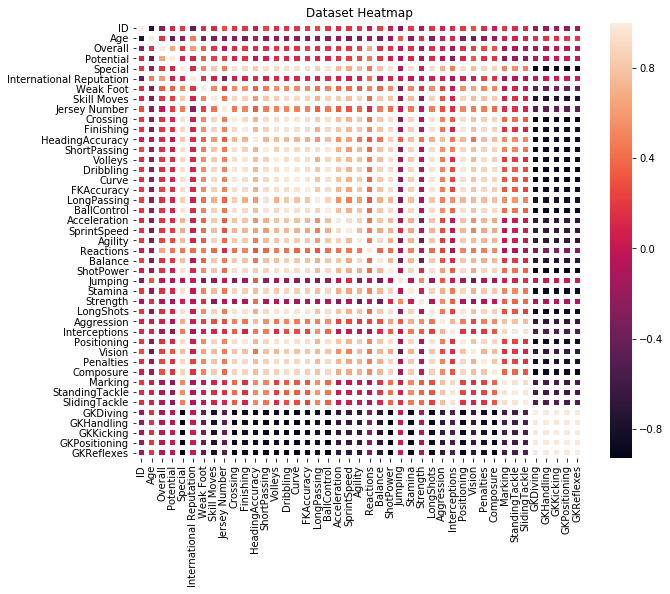

In [10]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),linewidths=4)
plt.title('Dataset Heatmap')
plt.show()

In [11]:
#Getting rid of all the elements that makes difficult to convert the different columns datatypes
df1['Value'] = df1['Value'].str.replace('€', '')
#df1['Value'] = df1['Value'].str.replace('K', '000')
df1['Value'] = df1['Value'].str.replace('M', '')
df1['Wage'] = df1['Wage'].str.replace('€', '')
df1['Wage'] = df1['Wage'].str.replace('K', '')

# Changing the datatypes of the selected columns
df1.Value = df1.Value.astype('float')
df1.Wage = df1.Wage.astype('int')
df1.Name = df1.Name.astype('category')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

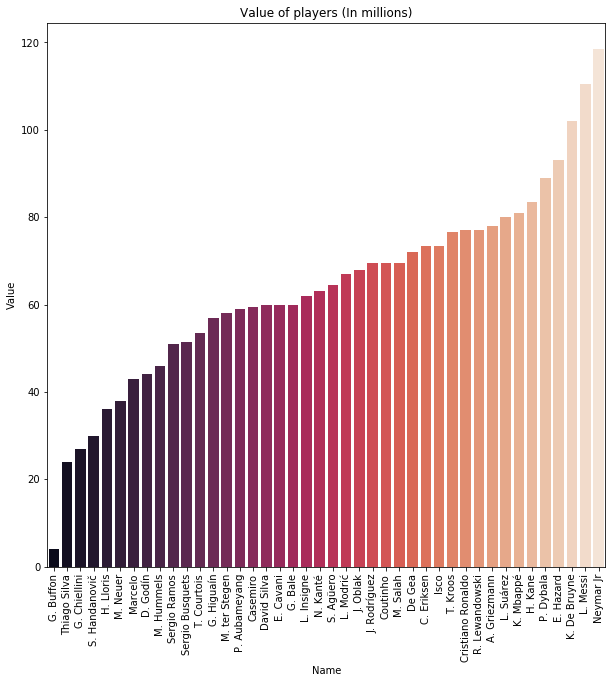

In [12]:
plt.figure(figsize=(10, 10))
df2 = df1.sort_values(['Value'])
sns.barplot(x = "Name" , y  = 'Value', data = df2 ,order = df2['Name'], 
             palette = 'rocket')
plt.title("Value of players (In millions)")
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

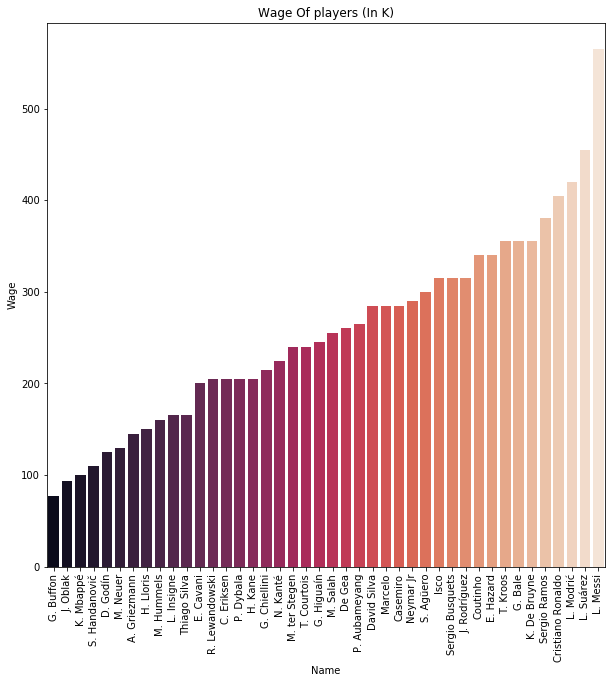

In [13]:
plt.figure(figsize=(10, 10))
df2 = df1.sort_values(['Wage'])
sns.barplot(x = "Name" , y  = 'Wage', data = df2 ,order = df2['Name'], 
             palette = 'rocket')
plt.title("Wage Of players (In K)")
plt.xticks(rotation = 90)

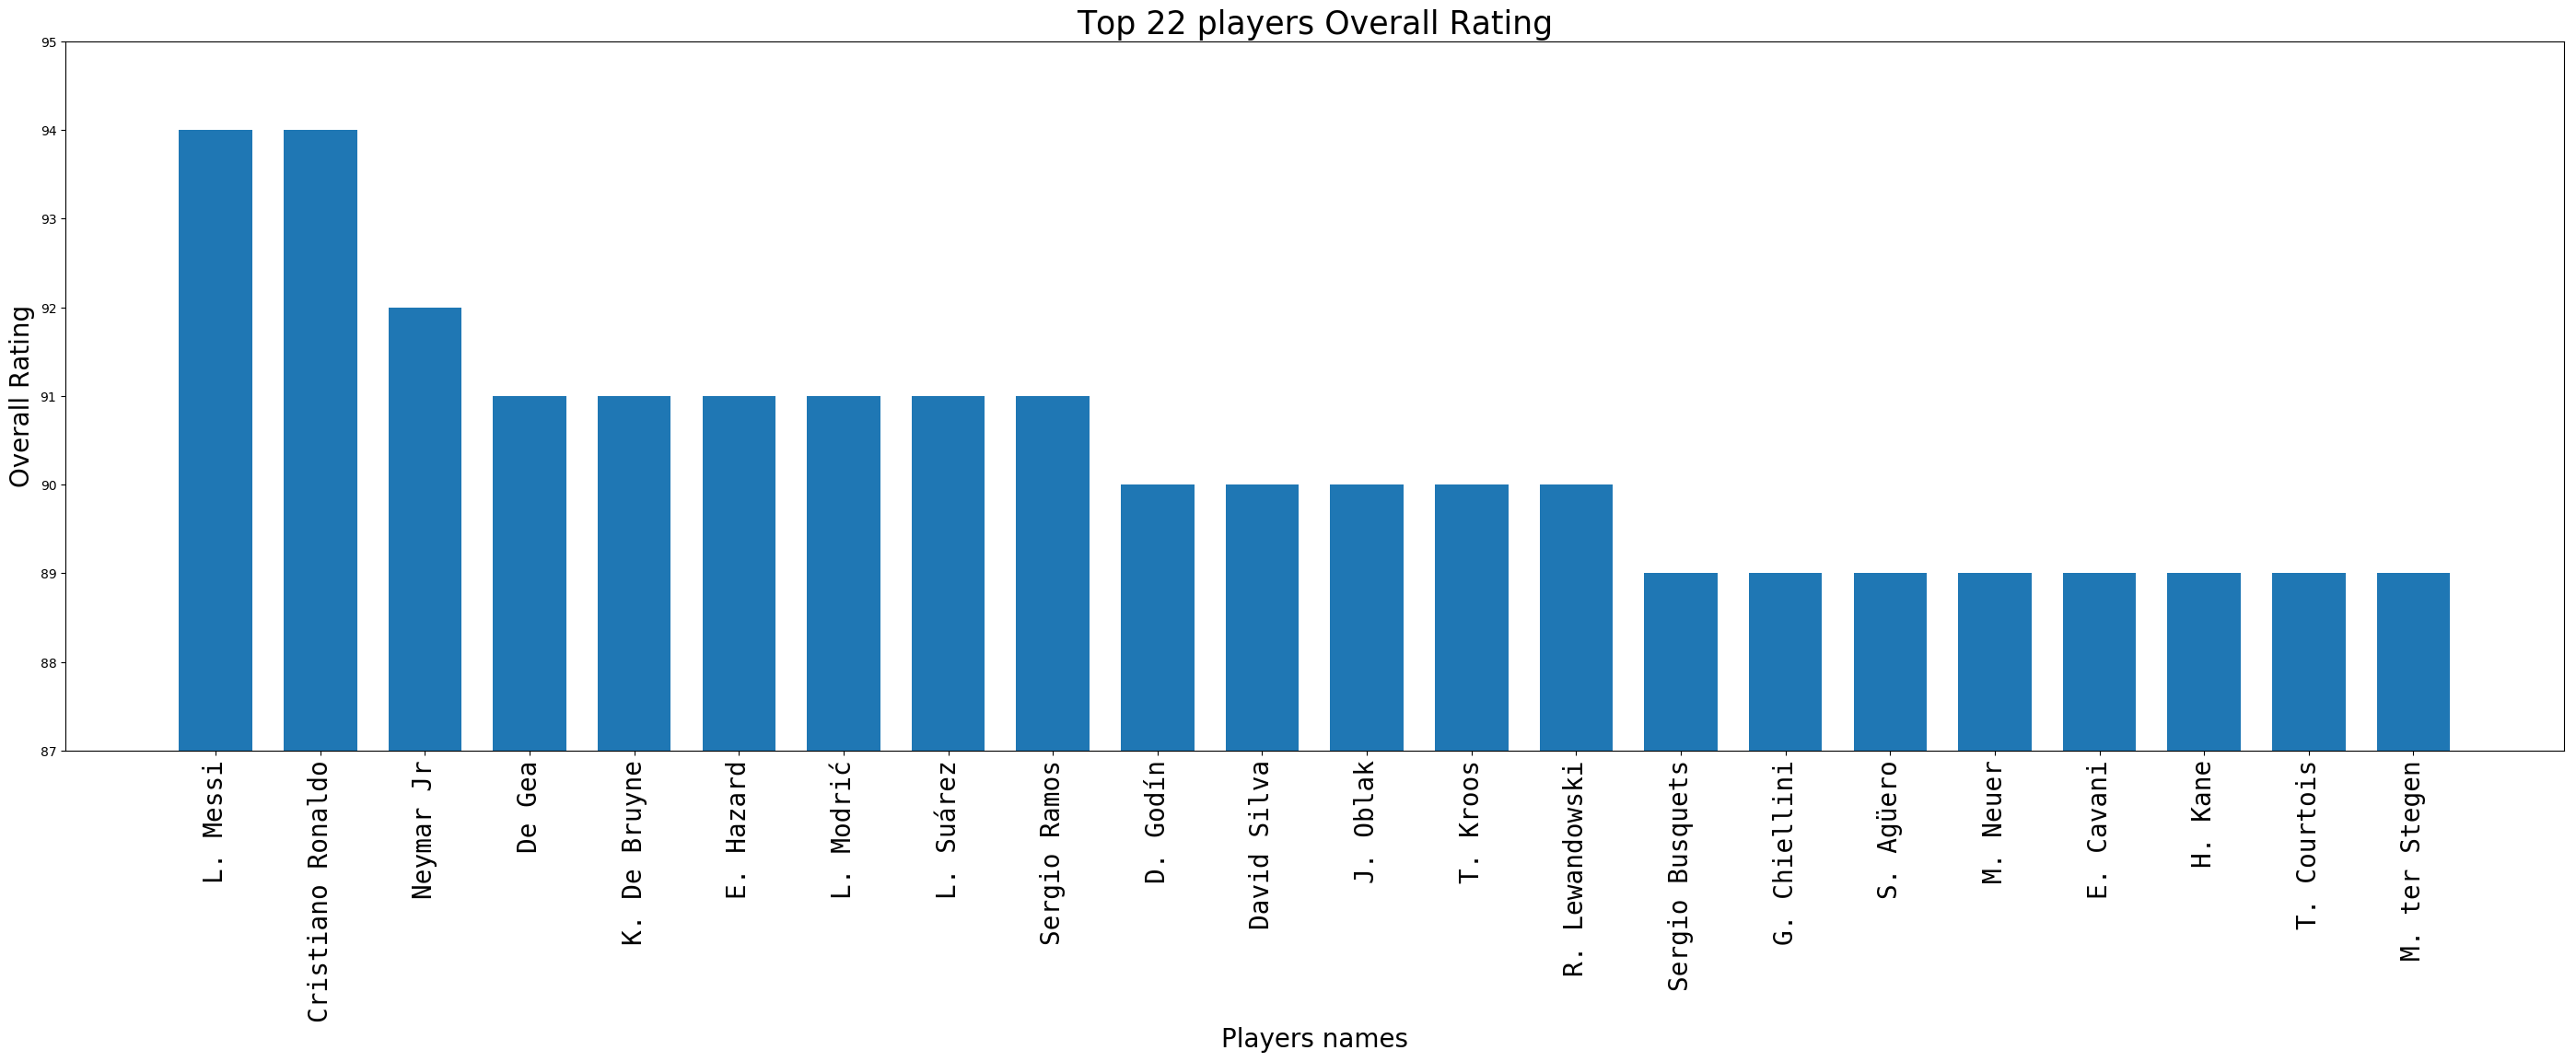

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()

df_best_players = pd.DataFrame.copy(df.sort_values(by = 'Overall' , 
                                                   ascending = False ).head(22))

plt.figure(figsize=(35, 10))
plt.bar('Name' , 'Overall' , data = df_best_players, width=0.7)
plt.xlabel('Players names', fontsize=20) 
plt.xticks(rotation = 90,fontsize=20, fontname='monospace')
plt.ylabel('Overall Rating', fontsize=20)
plt.title('Top 22 players Overall Rating', fontsize=25)
plt.ylim(87 , 95)
plt.show()